In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import pandas as pd

In [4]:
data = pd.read_csv('./forestfires.csv')#读取表
df = pd.DataFrame(data)#将表的数据导入
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [5]:
y_labels  = np.where(df['area']>0, 1, df['area'])
y_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [6]:
df_data = np.array(df.drop(['X','Y','month','day','FFMC','DMC','DC','ISI','area'],axis=1))
df_data

array([[ 8.2, 51. ,  6.7,  0. ],
       [18. , 33. ,  0.9,  0. ],
       [14.6, 33. ,  1.3,  0. ],
       ...,
       [21.2, 70. ,  6.7,  0. ],
       [25.6, 42. ,  4. ,  0. ],
       [11.8, 31. ,  4.5,  0. ]])

In [7]:
#随机75%作为训练集，25%作为测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   df_data, y_labels, random_state=0)

In [8]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (387, 4)
y_train shape: (387,)
X_test shape: (130, 4)
y_test shape: (130,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026730AAAF48>,
      dtype=object)

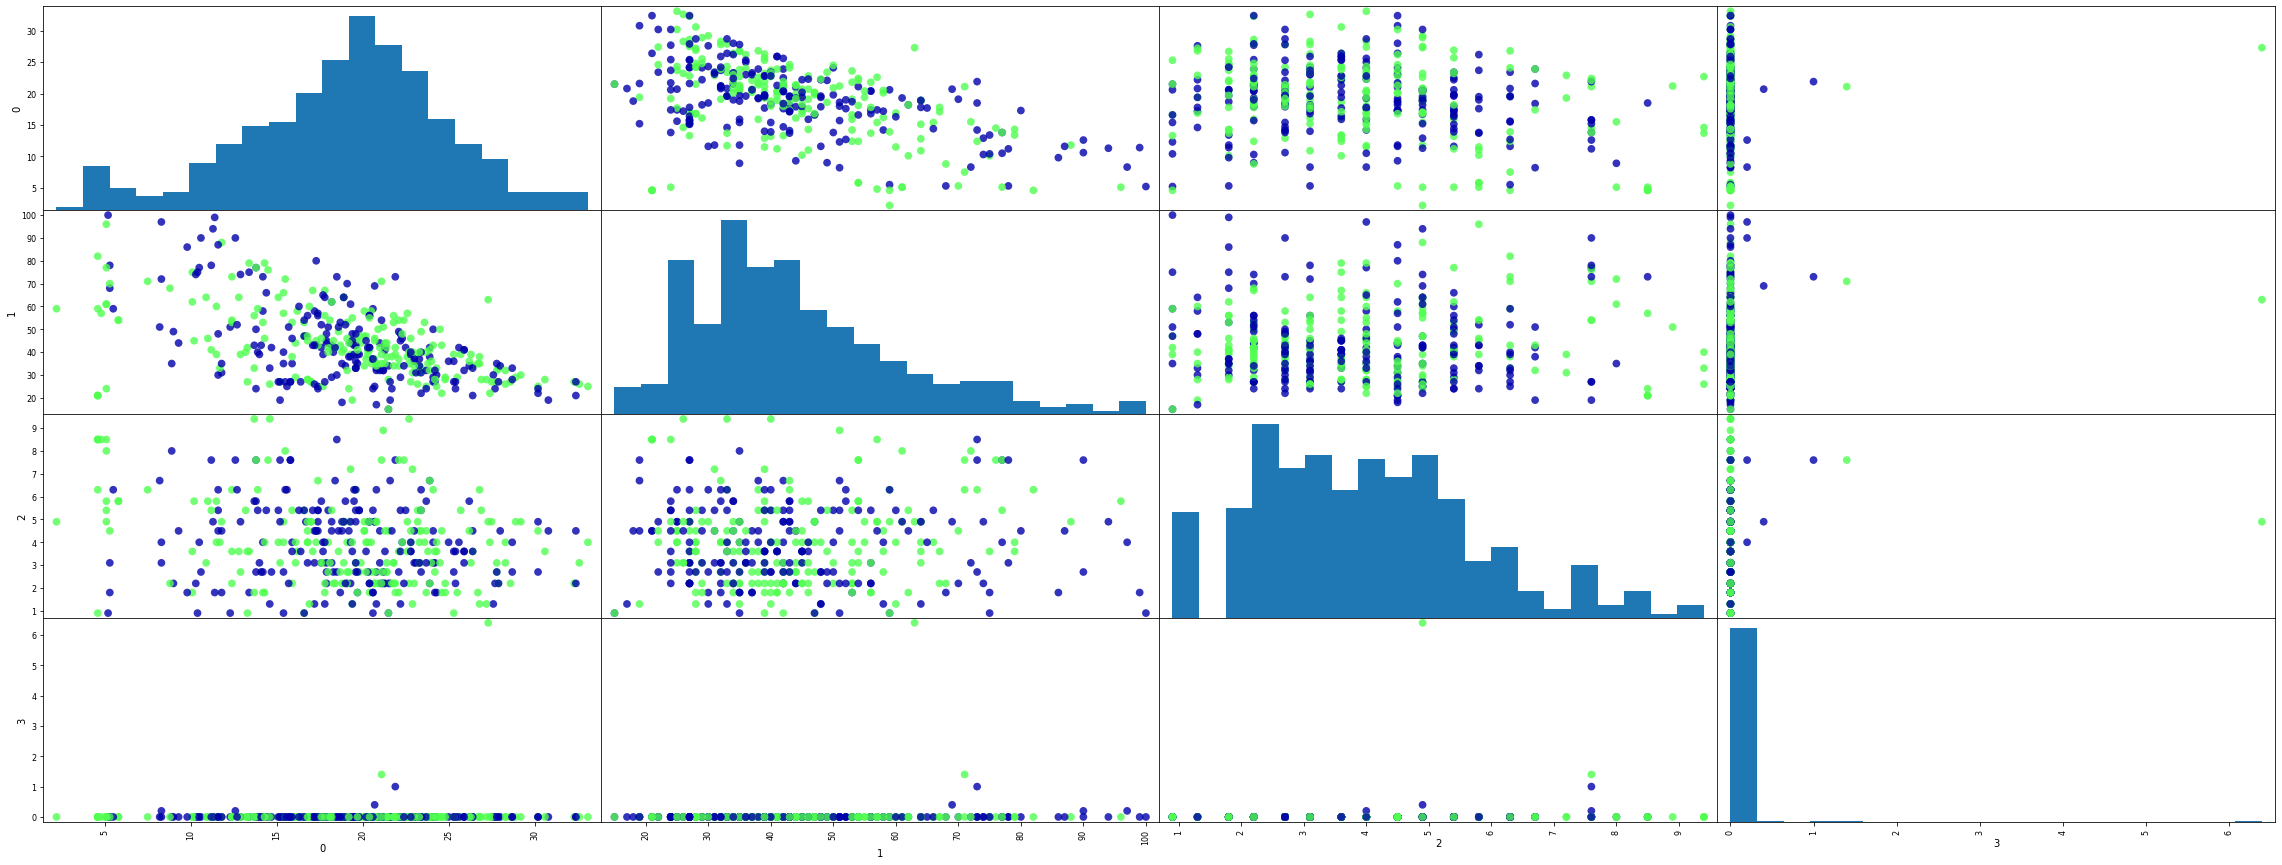

In [9]:
df_dataframe = pd.DataFrame(X_train)
pd.plotting.scatter_matrix(df_dataframe, c= y_train, figsize=(40, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap=mglearn.cm3)

Text(0, 0.5, 'area')

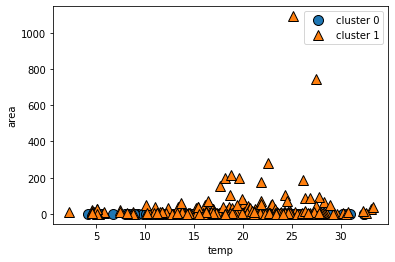

In [10]:
mglearn.discrete_scatter(df_data[:, 0], df.area, y_labels)
plt.legend(["cluster 0", "cluster 1"], loc='best')
plt.xlabel("temp")
plt.ylabel("area")

Text(0, 0.5, 'area')

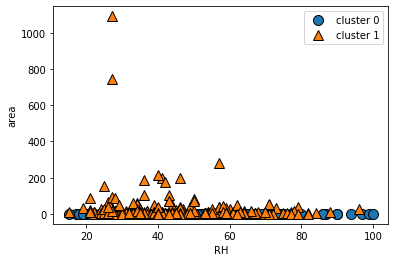

In [11]:
mglearn.discrete_scatter(df_data[:, 1], df.area, y_labels)
plt.legend(["cluster 0", "cluster 1"], loc='best')
plt.xlabel("RH")
plt.ylabel("area")

Text(0, 0.5, 'area')

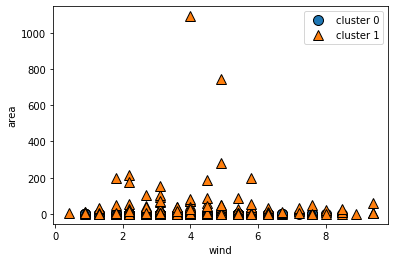

In [12]:
mglearn.discrete_scatter(df_data[:, 2], df.area, y_labels)
plt.legend(["cluster 0", "cluster 1"], loc='best')
plt.xlabel("wind")
plt.ylabel("area")

Text(0, 0.5, 'area')

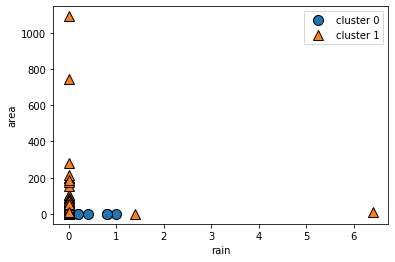

In [13]:
mglearn.discrete_scatter(df_data[:, 3], df.area, y_labels)
plt.legend(["cluster 0", "cluster 1"], loc='best')
plt.xlabel("rain")
plt.ylabel("area")

建立模型

In [14]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("训练集精准: ",knn.score(X_train,y_train))
print("测试集精准: ",knn.score(X_test,y_test))

训练集精准:  0.9844961240310077
测试集精准:  0.5


In [15]:
#SVM
from sklearn.svm import SVC
svm = SVC(C=100).fit(X_train, y_train)
print("训练集精准: ",svm.score(X_train,y_train))
print("测试集精准: ",svm.score(X_test,y_test))

训练集精准:  0.9741602067183462
测试集精准:  0.5153846153846153


D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [16]:
#决策树
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=16, random_state=0)
tree.fit(X_train, y_train)
print("训练集精准: ",tree.score(X_train,y_train))
print("测试集精准: ",tree.score(X_test,y_test))

训练集精准:  0.9483204134366925
测试集精准:  0.5461538461538461


In [17]:
#随机森林
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=50, random_state=0)
forest.fit(X_train, y_train)
print("训练集精准: ",forest.score(X_train,y_train))
print("测试集精准: ",forest.score(X_test,y_test))

训练集精准:  0.9844961240310077
测试集精准:  0.5769230769230769


In [18]:
#梯度提升树
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("训练集精准: ",gbrt.score(X_train,y_train))
print("测试集精准: ",gbrt.score(X_test,y_test))

训练集精准:  0.8217054263565892
测试集精准:  0.6


使用五折交叉验证测量精度

In [19]:
#knn
from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn,X_test,y_test,cv=5,scoring='accuracy')
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.50


In [20]:
#svm
scores=cross_val_score(svm,X_test,y_test,cv=5,scoring='accuracy')
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.51


D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'aut

In [21]:
#决策树
scores=cross_val_score(tree,X_test,y_test,cv=5,scoring='accuracy')
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.52


In [24]:
#随机森林
scores=cross_val_score(forest,X_test,y_test,cv=5,scoring='accuracy')
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.50


In [23]:
#梯度提升树
scores=cross_val_score(gbrt,X_test,y_test,cv=5,scoring='accuracy')
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.56


混淆矩阵

In [26]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
#SVM
y_pred = cross_val_predict(svm,X_test,y_test,cv=5)
print("Confusion matrix:\n{}".format(confusion_matrix(y_test,y_pred)))

Confusion matrix:
[[15 41]
 [22 52]]


D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'aut

In [28]:
#knn
y_pred = cross_val_predict(knn,X_test,y_test,cv=5)
print("Confusion matrix:\n{}".format(confusion_matrix(y_test,y_pred)))

Confusion matrix:
[[22 34]
 [31 43]]


In [29]:
#决策树
y_pred = cross_val_predict(tree,X_test,y_test,cv=5)
print("Confusion matrix:\n{}".format(confusion_matrix(y_test,y_pred)))

Confusion matrix:
[[27 29]
 [33 41]]


In [30]:
#随机森林
y_pred = cross_val_predict(forest,X_test,y_test,cv=5)
print("Confusion matrix:\n{}".format(confusion_matrix(y_test,y_pred)))

Confusion matrix:
[[25 31]
 [34 40]]


In [31]:
#梯度提升树
y_pred = cross_val_predict(gbrt,X_test,y_test,cv=5)
print("Confusion matrix:\n{}".format(confusion_matrix(y_test,y_pred)))

Confusion matrix:
[[27 29]
 [29 45]]


利用随机森林和梯度提升树构建的模型来进行预测。

In [32]:
X_new = np.array([[10,50,4,0]])
#随机森林
prediction = forest.predict(X_new)
print("Prediction:", prediction)

Prediction: [1.]


In [33]:
#梯度提升树
prediction = gbrt.predict(X_new)
print("Prediction:", prediction)

Prediction: [1.]
